In [1]:
#importing required libraries
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing datasets of IPL
df_matches = pd.read_csv("matches.csv")
df_deliveries = pd.read_csv("deliveries.csv")

In [3]:
#getting first 5 rows from matches dataset
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#getting how many rows and columns in the matches dataset
df_matches.shape

(756, 18)

In [5]:
#getting brief information about the dataset
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#getting first 5 rows from deliveries dataset
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Data Preparation and Cleaning
- df_matches

In [8]:
#droping unnecessary columns
df_matches.drop(columns=["id","dl_applied","umpire1","umpire2","umpire3"],inplace=True)

In [9]:
#converting date column into datetime series
df_matches.date = pd.to_datetime(df_matches.date)

In [10]:
#checking if there is any missing values in the matches datset
df_matches.isna().sum()

season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [11]:
#Filling missing values in the city column by most frequent city 
df_matches.city.fillna(df_matches.city.value_counts()[0],inplace=True)

In [12]:
#dropping missing values of remaning columns
df_matches.dropna(inplace=True)
df_matches.reset_index(inplace=True)

In [13]:
#getting all the teams played in IPL
df_matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
#replacing same teams with a single name
df_matches.replace({"Delhi Daredevils":'Delhi Capitals',
                    "Deccan Chargers":'Sunrisers Hyderabad',
                    "Rising Pune Supergiants":"Rising Pune Supergiant",
                    "Pune Warriors":'Rising Pune Supergiant'},inplace=True)

- df_deliveries

In [15]:
#checking if there is any missing values in the deliveries datset
df_deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [16]:
#dropping unnecessary columns with large amount of missing vales
df_deliveries.drop(columns=["player_dismissed","dismissal_kind","fielder"],inplace=True)

In [17]:
#getting brief information about deliveries dataset 
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   match_id       179078 non-null  int64 
 1   inning         179078 non-null  int64 
 2   batting_team   179078 non-null  object
 3   bowling_team   179078 non-null  object
 4   over           179078 non-null  int64 
 5   ball           179078 non-null  int64 
 6   batsman        179078 non-null  object
 7   non_striker    179078 non-null  object
 8   bowler         179078 non-null  object
 9   is_super_over  179078 non-null  int64 
 10  wide_runs      179078 non-null  int64 
 11  bye_runs       179078 non-null  int64 
 12  legbye_runs    179078 non-null  int64 
 13  noball_runs    179078 non-null  int64 
 14  penalty_runs   179078 non-null  int64 
 15  batsman_runs   179078 non-null  int64 
 16  extra_runs     179078 non-null  int64 
 17  total_runs     179078 non-null  int64 
dtypes: i

### Exploratory Analysis and Visualization

####  Number of wins by top teams per season

In [18]:
data = df_matches[["season","winner"]].copy()

In [19]:
Top_teams = df_matches.winner.value_counts()[:8]
Top_teams = Top_teams.keys()

In [20]:
#Calculating how many matches win by top teams in each season
data = pd.crosstab(data.season,data.winner).transpose()
data = data.stack().reset_index()
data.rename(columns={0:"win_count"},inplace=True)
data = data[data.winner.isin(Top_teams)]

In [21]:
for i in data.season.unique():
    globals()["y_{}".format(i)] = data[data["season"]==i]
DL = [y_2008,y_2009,y_2010,y_2011,y_2012,y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019]

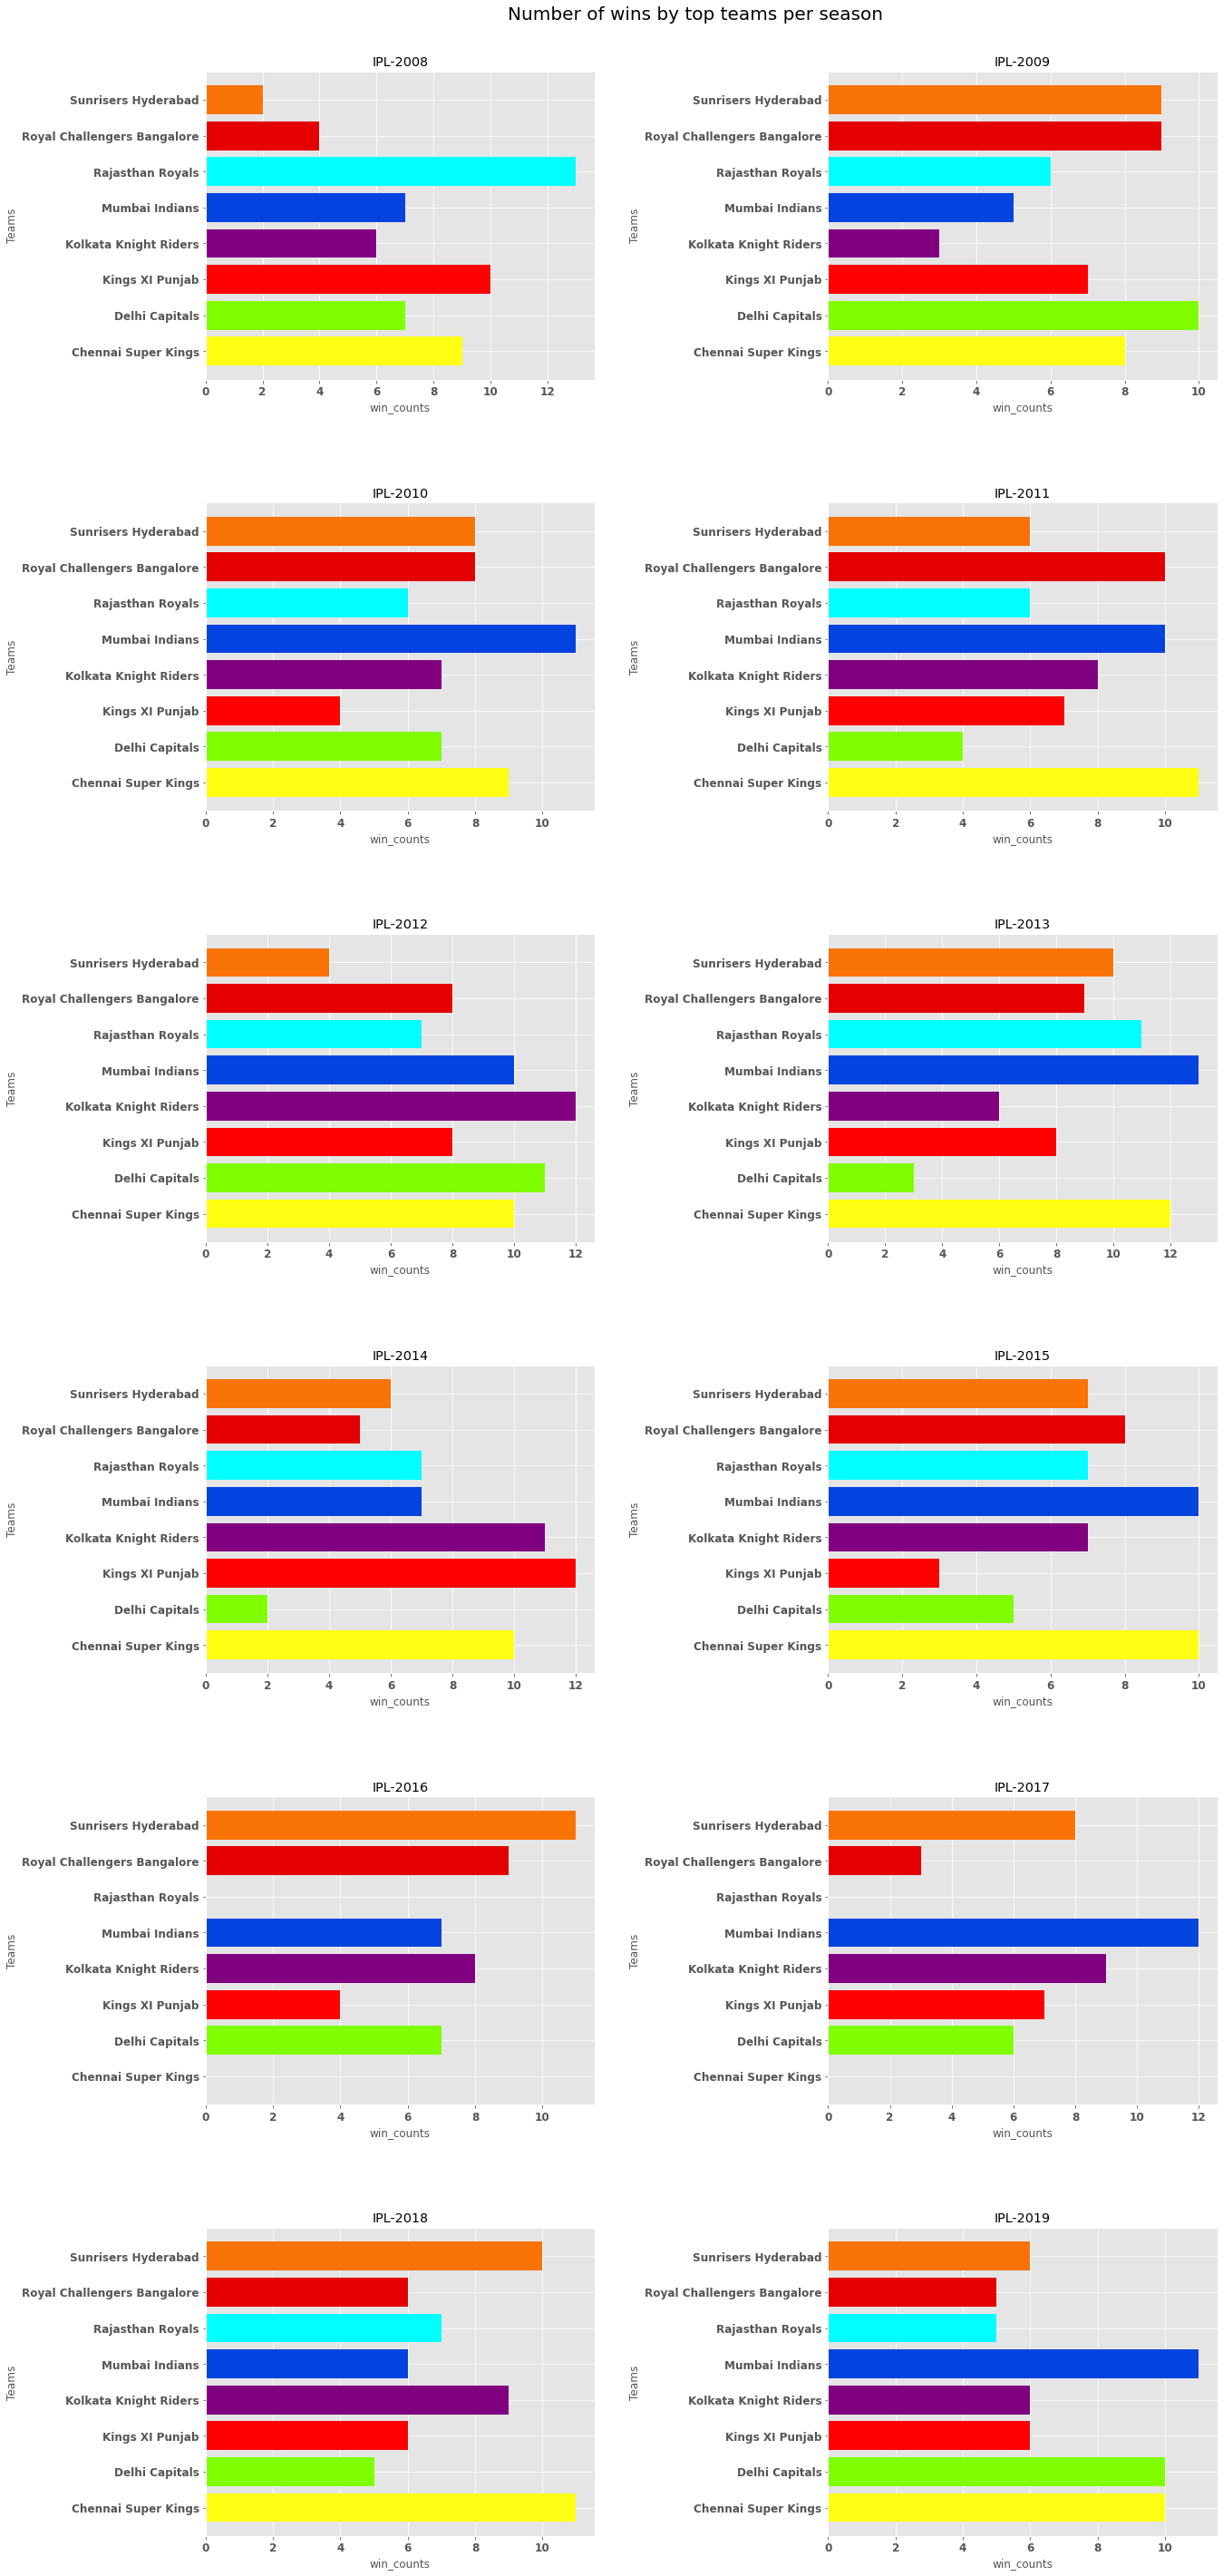

In [22]:
plt.style.use("ggplot")
plt.figure(figsize=(20,50))
k = 2008
for i,j in enumerate(DL):
    plt.subplot(6,2,i+1)
    plt.barh(j.winner,j.win_count,color=["#FFFF14","#7FFF00","#FF0000","#800080","#0343DF","#00FFFF","#E50000","#F97306"])
    plt.title(f"IPL-{k}")
    plt.xlabel("win_counts")
    plt.ylabel("Teams")
    plt.yticks(weight="bold",fontsize=12)
    plt.xticks(weight="bold",fontsize=12)
    k+=1
   
plt.subplots_adjust(hspace=0.4,wspace=0.6)
plt.suptitle("Number of wins by top teams per season",fontsize=20,y=0.9)
plt.show()

#### Cities in which Teams won maximum matches

In [23]:
city_won = df_matches[["city","winner"]].copy()

In [24]:
city_won = pd.crosstab(city_won.city,city_won.winner).stack().reset_index()
city_won.rename(columns={0:"win_count"},inplace = True)
city_won = city_won[city_won["winner"].isin(Top_teams)].sort_values("win_count",ascending=False)

In [25]:
# selecting only top 8 teams
city_won = city_won.head(8)

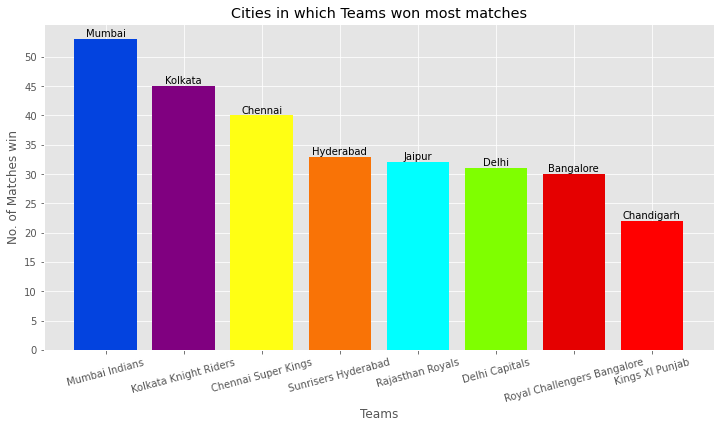

In [26]:
l = list(city_won.city)
j=0
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
rec = plt.bar(city_won.winner,city_won.win_count,color=["#0343DF","#800080","#FFFF14","#F97306","#00FFFF","#7FFF00","#E50000","#FF0000"])
for i in rec:
    h = i.get_height();
    plt.text(i.get_x()+i.get_width()/2.,h+.4,l[j],ha="center")
    j+=1
plt.yticks(np.arange(0,55,5))
plt.title("Cities in which Teams won most matches")
plt.xlabel("Teams")
plt.ylabel("No. of Matches win")
plt.xticks(rotation=15)
plt.show()

#### Results while bowling first

In [27]:
bowling_first_win = df_matches[(df_matches.win_by_runs==0) & (df_matches.win_by_wickets>=1)]

In [28]:
matches = bowling_first_win.win_by_wickets.value_counts()
wickets = bowling_first_win.win_by_wickets.value_counts().index

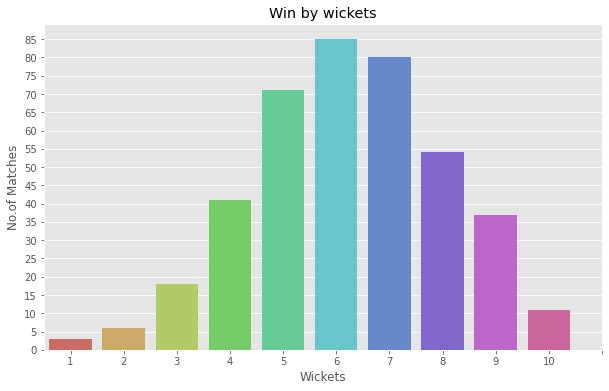

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x=wickets,y=matches,palette="hls")
plt.title("Win by wickets")
plt.xlabel("Wickets")
plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,90,5))
plt.ylabel("No.of Matches")
plt.show()

#### teams, won matches while bowling first

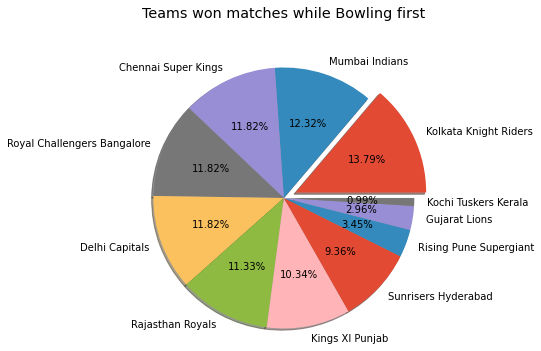

In [30]:
plt.pie(bowling_first_win.winner.value_counts(),labels=bowling_first_win.winner.value_counts().keys(),radius = 1.5,autopct="%.2f%%",shadow=True,wedgeprops={'linewidth':1},explode=[0.15 if i==0 else 0 for i in range(11)])
plt.title("Teams won matches while Bowling first",y=1.3)
plt.show()

#### Teams, won by maximum wickets in ipl

In [31]:
win_by_max_wickets = bowling_first_win[bowling_first_win.win_by_wickets==bowling_first_win.win_by_wickets.max()]
demo_df = win_by_max_wickets[["winner","win_by_wickets"]].drop_duplicates().set_index("winner")
pd.concat([demo_df,win_by_max_wickets.winner.value_counts()],axis=1).rename(columns={"winner":"win_count"})

,win_by_wickets,win_count
Kolkata Knight Riders,10,1
Kings XI Punjab,10,1
Sunrisers Hyderabad,10,2
Delhi Capitals,10,1
Royal Challengers Bangalore,10,3
Rajasthan Royals,10,1
Mumbai Indians,10,1
Chennai Super Kings,10,1


#### Results while Bating first

In [32]:
bating_first_win = df_matches[(df_matches.win_by_wickets == 0) & (df_matches.win_by_runs>0)]

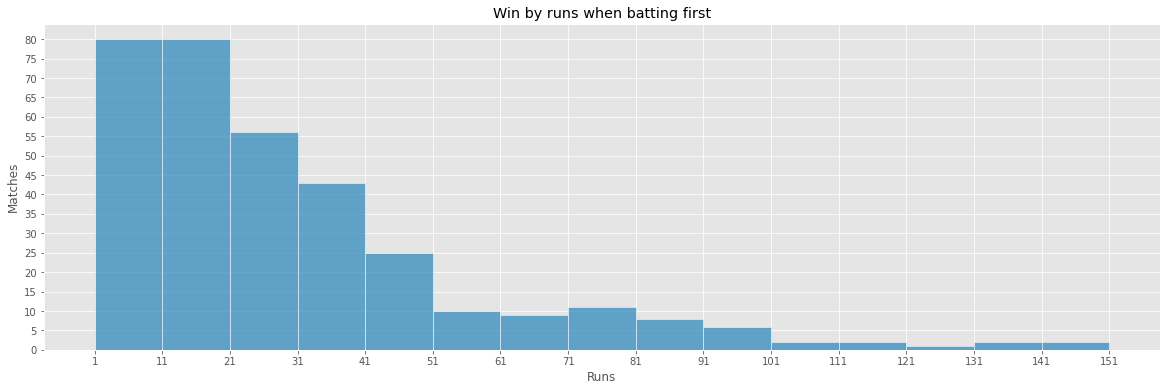

In [33]:
plt.figure(figsize=(20,6))
sns.histplot(bating_first_win.win_by_runs,bins=15,edgecolor="white",palette="hls",binwidth=10)
plt.title("Win by runs when batting first")
plt.xlabel("Runs")
plt.xticks(np.arange(1,160,10))
plt.yticks(np.arange(0,85,5))
plt.ylabel("Matches")
plt.show()

#### Teams, won matches while batting first

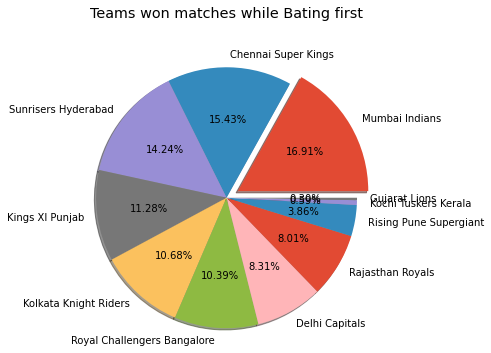

In [34]:
plt.pie(bating_first_win.winner.value_counts(),labels=bating_first_win.winner.value_counts().keys(),radius = 1.5,autopct="%.2f%%",shadow=True,wedgeprops={'linewidth':1},explode=[0.15 if i==0 else 0 for i in range(11)])
plt.title("Teams won matches while Bating first",y=1.3)
plt.show()

#### team, win by maximum runs in IPL

In [35]:
bating_first_win[bating_first_win.win_by_runs==bating_first_win.win_by_runs.max()]

,index,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
43,43,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla


#### Most successfull teams in IPL

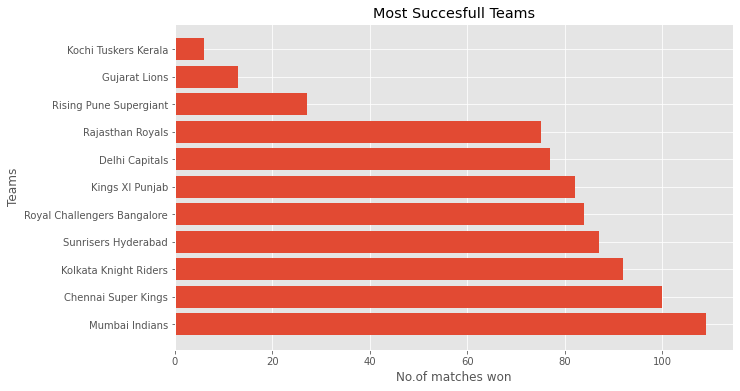

In [36]:
plt.figure(figsize=(10,6))
plt.barh(df_matches.winner.value_counts().keys(),df_matches.winner.value_counts())
plt.ylabel("Teams")
plt.xlabel("No.of matches won")
plt.title("Most Succesfull Teams")
plt.show()

#### Top 10 man of the match players in IPL

In [37]:
df_matches.player_of_match.value_counts()[:10]
mom_name = list(df_matches.player_of_match.value_counts()[:10].keys())
mom_count = list(df_matches.player_of_match.value_counts()[:10].values)

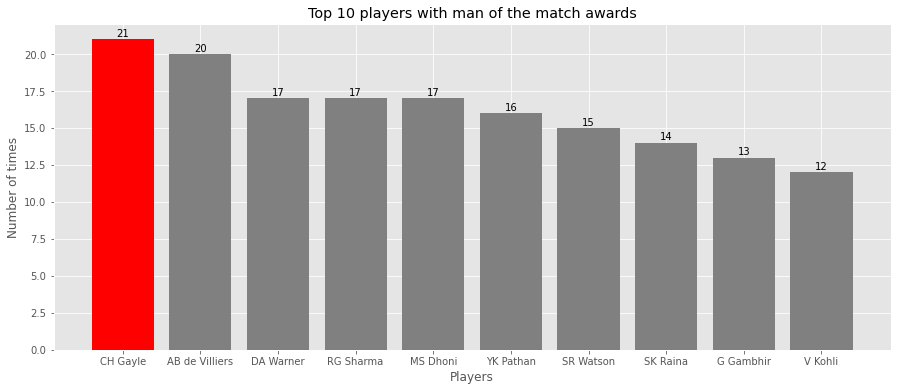

In [38]:
plt.figure(figsize=(15,6))
cls = ["grey" if (x<max(mom_count)) else "red" for x in mom_count]
bar  = plt.bar(mom_name,mom_count,color=cls)
plt.xlabel("Players")
plt.ylabel("Number of times")
plt.title("Top 10 players with man of the match awards")

for i in bar:
    h = i.get_height()
    plt.text(i.get_x()+i.get_width()/2.,h+.2,h,ha="center")
plt.show()

#### which Toss decision is taking most, Bat or Field

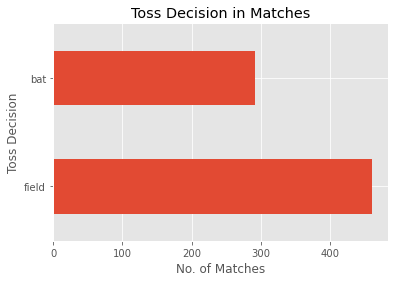

In [39]:
df_matches.toss_decision.value_counts().plot(kind="barh")
plt.ylabel("Toss Decision")
plt.xlabel("No. of Matches")
plt.title("Toss Decision in Matches");

#### Toss win Match win , Which team did better

In [40]:
teams = df_matches[df_matches.toss_winner==df_matches.winner]["winner"].value_counts()

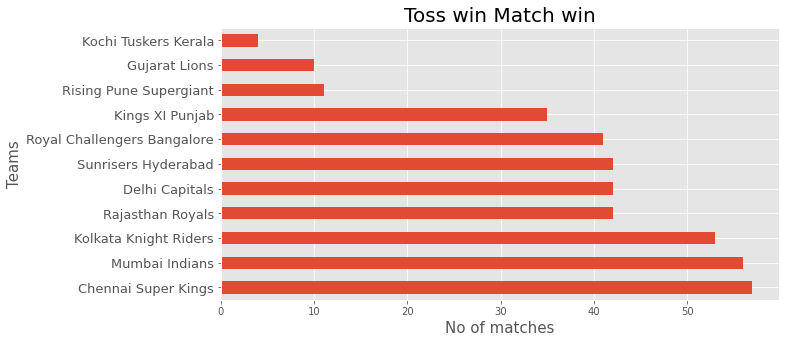

In [41]:
plt.figure(figsize=(10,5))
teams.plot(kind="barh")
plt.yticks(fontsize=13)
plt.title("Toss win Match win",fontsize=20)
plt.xlabel("No of matches",fontsize=15)
plt.ylabel("Teams",fontsize=15)
plt.show()

#### Season with maximum number of matches

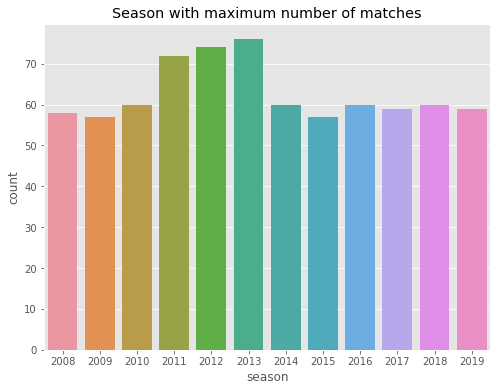

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x="season",data = df_matches)
plt.title("Season with maximum number of matches");

In [43]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


In [44]:
match1 = df_deliveries[df_deliveries.match_id==1]
match1.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore'], dtype=object)

In [45]:
srh = match1[match1.inning == 1]
print("SRH - ", srh.total_runs.sum())
srh.batsman_runs.value_counts()

SRH -  207


1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [46]:
rcb=match1[match1.inning ==2]
print("RCB - ",rcb.total_runs.sum())
rcb.batsman_runs.value_counts()

RCB -  172


0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

#### top 10 players with most number of sixes

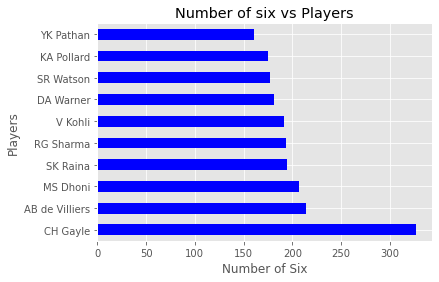

In [47]:
df_deliveries[df_deliveries.batsman_runs==6]["batsman"].value_counts()[:10].plot(kind="barh",color="blue")
plt.ylabel("Players")
plt.xlabel("Number of Six")
plt.title("Number of six vs Players")
plt.show()

####  top 5 preferable bowlerers in superover 

In [48]:
df_deliveries[df_deliveries.is_super_over==1]["bowler"].value_counts()[:5]

JP Faulkner      11
JJ Bumrah         8
Kamran Khan       7
CH Morris         7
R Vinay Kumar     7
Name: bowler, dtype: int64

#### Top 5 players having maximum runs in IPL

In [49]:
max_run = df_deliveries[["batsman","batsman_runs"]]
max_run = max_run.groupby("batsman").sum()
max_run.nlargest(5,"batsman_runs")

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632


#### which players have maximum runs in an inning?

In [50]:
max_run_inning = df_deliveries[["match_id","batsman","batsman_runs"]]
max_run_in = max_run_inning.groupby(["batsman","match_id"]).sum()
max_run_in.nlargest(5,"batsman_runs")

,,batsman_runs
batsman,match_id,
CH Gayle,411,175
BB McCullum,60,158
AB de Villiers,562,133
RR Pant,7935,130
AB de Villiers,620,129


In [51]:
df_deliveries[(df_deliveries.match_id == 411) & (df_deliveries.batsman == "CH Gayle")].batsman_runs.value_counts()

1    21
0    18
6    17
4    13
Name: batsman_runs, dtype: int64

#### Bowlers with most wide balls and no balls

In [52]:
wn = df_deliveries[["bowler","wide_runs","noball_runs"]]
wn = wn.groupby("bowler").sum()
wide = wn.wide_runs.nlargest(5)
noball = wn.noball_runs.nlargest(5)

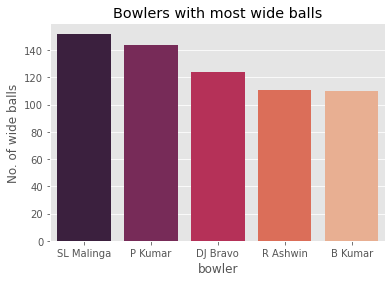

In [53]:
sns.barplot(x=wide.index,y=wide,palette="rocket")
plt.ylabel("No. of wide balls")
plt.title("Bowlers with most wide balls")
plt.show()

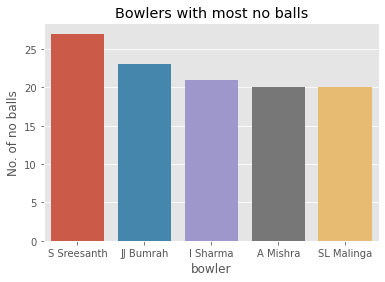

In [54]:
sns.barplot(x=noball.index,y=noball)
plt.ylabel("No. of no balls")
plt.title("Bowlers with most no balls")
plt.show()

## Conclusion 
- Teams won maximum matches in their homeground.
- Royal Challengers Bangalore wins 3 times by 10 wickets(without loosing any wicket) in IPL
- most of the matches won by 6 wickets
- Kolkata Knight Riders wins maximum matches while bowling first
- Mumbai Indians won by maximum(146) runs in IPL against Delhi Capital
- most of the matches win by 10-20 runs
- Mumbai Indians won maximum matches while batting first
- CH Gayle hitted maximum number of sixes in IPL
- Virat Kohli have maximum runs in IPL.
- After winning toss most teams decide to field first.
- Seasons in which maximum matches played were 2011,2012,2013
- JP Faulkner is the most preferable bowler in IPL
- CH Gayle have maximum(175) runs in an inning with 17 sixes and 13 fours.
- Top players with mam of the match award are CH gayle , AB de Villiers
- SL Malinga throws maximum wide balls in IPL
- S Sreesanth throws maximum no balls in IPL